## Versão para teste de Árvore de Decisão

In [2]:
# Importar caminho
import os
import sys
from sklearn.tree import DecisionTreeClassifier

# Adicionando o diretório-raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [6]:
# Importar variáveis
from src.features.data_process import x_test, x_train, y_binary_test, y_binary_train

In [30]:
# Fazer o treinamento do modelo
from sklearn.tree import DecisionTreeClassifier

decision_tree_v1 = DecisionTreeClassifier()
decision_tree_v1.fit(x_train, y_binary_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# Salvar modelo em models
import joblib

caminho_modelo = '../models/decision_tree_v1.pkl'
joblib.dump(decision_tree_v1, caminho_modelo)

print(f"Modelo salvo em: {caminho_modelo}")

Modelo salvo em: ../models/decision_tree_v1.pkl


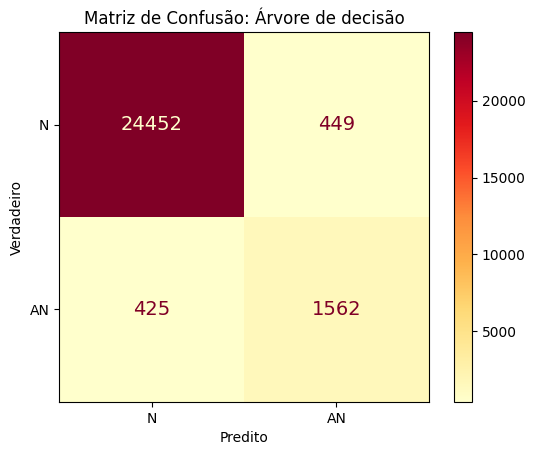

--- Métricas de Desempenho ---
Accuracy: 96.75%
Recall: 78.61%
ROC: 0.8840
F1-Score: 0.7814
Precision: 77.67%
Specificity: 98.20%
------------------------------


In [33]:
# Fazer previsão
import joblib

# Carregando o modelo salvo da pasta models/
modelo_carregado = joblib.load('../models/decision_tree_v1.pkl')

# Agora você pode usar o modelo para fazer previsões
previsao = modelo_carregado.predict(x_test)

# Imprimir resultados
from src.models.evaluate_model import evaluate_model
evaluate_model(y_binary_test, previsao, "Matriz de Confusão: Árvore de decisão")

### Encontrar melhores parâmetros para a Árvore de Decisão

In [ ]:
# Encontrar os melhores parâmetros
from sklearn.model_selection import GridSearchCV
import joblib

decision_tree = DecisionTreeClassifier()

param_grid = {
    # 'min_samples_split': [2, 4, 16, 64], # Nro min para que seja dividido
    # 'min_samples_leaf' : [1, 2, 4, 8], # Nro mín para ser folha
    'max_depth'        : [8, 32, 64, 128, 256], # Crescimento da árvore
    'criterion'        : ['gini', 'entropy']
}

# Fazer a chamada da função
grid = GridSearchCV(decision_tree, param_grid, cv=5, scoring='recall', n_jobs = -1)

grid.fit(x_train, y_binary_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor sensibilidade:", grid.best_score_)

# Salve o melhor modelo encontrado pelo GridSearchCV
caminho_melhor_modelo_v2 = '../models/melhor_decision_tree_v2.pkl'
joblib.dump(grid.best_estimator_, caminho_melhor_modelo_v2)

print(f"O melhor modelo foi salvo em: {caminho_melhor_modelo_v2}")

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 264}
Melhor sensibilidade: 0.7838668954357773
O melhor modelo foi salvo em: ../models/melhor_decision_tree_v2.pkl


In [10]:
# Auxiliar
import joblib
melhor_decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth = 32, min_samples_leaf = 1, min_samples_split = 4)

caminho_melhor_modelo = '../models/melhor_decision_tree_v1.pkl'

melhor_decision_tree.fit(x_train, y_binary_train)
joblib.dump(melhor_decision_tree, caminho_melhor_modelo)

['../models/melhor_decision_tree_v1.pkl']

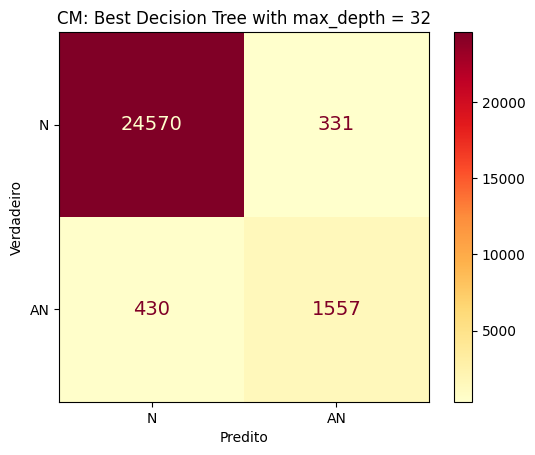

--- Métricas de Desempenho ---
Accuracy: 97.17%
Recall: 78.36%
ROC: 0.8852
F1-Score: 0.8036
Precision: 82.47%
Specificity: 98.67%
------------------------------


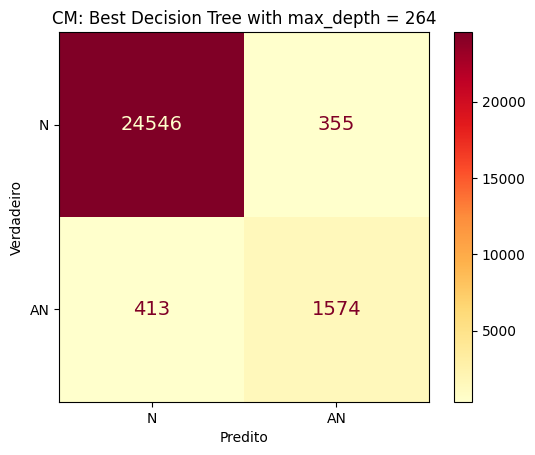

--- Métricas de Desempenho ---
Accuracy: 97.14%
Recall: 79.21%
ROC: 0.8889
F1-Score: 0.8039
Precision: 81.60%
Specificity: 98.57%
------------------------------


In [ ]:
# Avaliar melhor modelo
from src.models.evaluate_model import evaluate_model
caminho_melhor_modelo_v1 = '../models/melhor_decision_tree_v1.pkl'
caminho_melhor_modelo_v2 = '../models/melhor_decision_tree_v2.pkl'

melhor_modelo_v1 = joblib.load(caminho_melhor_modelo_v1)
melhor_modelo_v2 = joblib.load(caminho_melhor_modelo_v2)

previsao_melhor_modelo_v1 = melhor_modelo_v1.predict(x_test)
previsao_melhor_modelo_v2 = melhor_modelo_v2.predict(x_test)

evaluate_model(y_binary_test, previsao_melhor_modelo_v1, "CM: Best Decision Tree with max_depth = 32")
evaluate_model(y_binary_test, previsao_melhor_modelo_v2, "CM: Best Decision Tree with max_depth = 256")